Load Model

In [100]:
from tensorflow.keras.models import model_from_yaml
from sklearn.metrics import confusion_matrix
import pylab as plt
import numpy as np

In [101]:
def loadModel(yamlPathName, h5PathName):
    with open(yamlPathName+'.yaml', 'r') as yaml_file:
        loaded_model_yaml = yaml_file.read()
        loaded_model = model_from_yaml(loaded_model_yaml)

        # load weights into new model
        loaded_model.load_weights(h5PathName+'.h5')
    
    loaded_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return loaded_model

In [102]:
def filterAndShow(filter1, filter2, modelOutput):
    np.set_printoptions(suppress=True)
    print(modelOutput)
    test = []
    test_y = []

    for i in range(len(modelOutput)):
        if(modelOutput[i] <filter1 or modelOutput[i]>filter2):
            test.append(modelOutput[i])
            test_y.append(Y1_test[i])

    test1 = np.array(test)
    testy1 = np.array(test_y)
    print(testy1)
    print(test1.shape)
    print(testy1.shape)

In [103]:
def showConfusionMatrix(resultToShow, DataToSetThreshold):
    labels = ['positive','negative']
    cm = confusion_matrix(resultToShow, DataToSetThreshold>0.5)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of LSTM classifier')
    fig.colorbar(cax)
    ax.set_xticklabels(['']+labels)
    ax.set_yticklabels(['']+labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [104]:
def showWordWithCode(readIn, colName, dataToMap): #readIn = pd.read_csv ,colName = column name in string, dataToMap = list of sentiment
    test = tokenizer.texts_to_sequences(readIn[colName].values)
    reverse_word_map = dict(map(reversed, tokenizer.word_index.items())) # map id to all word in dic
    
    def sequence_to_text(list_of_indices):
        # Looking up words in dictionary
        words = [reverse_word_map.get(letter) for letter in list_of_indices]
        return(words)
    
    my_texts = list(map(sequence_to_text, X1_test))
    my_texts[13]
    return my_texts

In [105]:
def saveSentimentAndResult(sentenceToSave, resultToSave):
    sen_temp = ""
    SentimentSave = []
    for one_sentence in sentenceToSave:
        for word in one_sentence:
            if isinstance(word, str):
                sen_temp = sen_temp + " " + word
            
        SentimentSave.append(sen_temp)
        sen_temp = ""
            
    #make 1 Dim predict result
    resultSave = []
    for arr_result in resultToSave:
        for result in arr_result:
            #print(result)
            resultSave.append(result)
            
    data = {'lemma_review': SentimentSave, 'predict score': resultSave}
    toFile = pd.DataFrame(data)
    toFile.to_csv("./for_compare.csv", index=False)

In [106]:
test = loadModel('./3_Save_add_TestTrain_Size/addTestTrainSize','./3_Save_add_TestTrain_Size/addTestTrainSize')

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import random
import re
import pandas as pd
import pandas as pd

lemma_result = pd.read_csv("../Clean/lemma_result.csv")
max_fatures = 7000 #จำนวนคำที่ใช้ใน model
tokenizer = Tokenizer(num_words=max_fatures, split=' ') 
tokenizer.fit_on_texts(lemma_result['cleaned_review'].values)
X1 = tokenizer.texts_to_sequences(lemma_result['cleaned_review'].values)
X1 = pad_sequences(X1, padding='pre')
Y1 = pd.get_dummies(lemma_result['Label']).values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, train_size = 0.8, random_state = 42 )

batch_size = 32
score,acc = test.evaluate(X1_test, Y1_test[:,0], verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

200/200 - 2s - loss: 1.0907 - accuracy: 0.7500
score: 1.09
acc: 0.75


In [108]:
test_o = test.predict(X1_test)
filterAndShow(0.4,0.6,test_o)

[[0.0071913 ]
 [0.99754757]
 [0.99837875]
 [0.9990108 ]
 [0.3058723 ]
 [0.00000765]
 [0.00138833]
 [0.99658525]
 [0.9995421 ]
 [0.9020874 ]
 [0.00017783]
 [0.6334617 ]
 [0.99869484]
 [0.9605784 ]
 [0.9876993 ]
 [0.95891416]
 [0.00000314]
 [0.7984375 ]
 [0.01454883]
 [0.00643752]
 [0.00000204]
 [0.9968528 ]
 [0.9988331 ]
 [0.04735399]
 [0.99979144]
 [0.24481896]
 [0.9755476 ]
 [0.00014145]
 [0.01281525]
 [0.00007528]
 [0.99724007]
 [0.9998286 ]
 [0.62061745]
 [0.00072333]
 [0.999526  ]
 [0.00094909]
 [0.98424006]
 [0.9700449 ]
 [0.9980738 ]
 [0.00001879]
 [0.00201369]
 [0.9732415 ]
 [0.99226135]
 [0.9954602 ]
 [0.00001268]
 [0.01209067]
 [0.53452206]
 [0.00743158]
 [0.97446376]
 [0.00219014]
 [0.00050977]
 [0.9979405 ]
 [0.99945575]
 [0.9992685 ]
 [0.9934743 ]
 [0.00004228]
 [0.99990034]
 [0.08532558]
 [0.60567224]
 [0.9985707 ]
 [0.99984384]
 [0.00672532]
 [0.99836224]
 [0.00279943]
 [0.9989366 ]
 [0.9430574 ]
 [0.00070379]
 [0.00133301]
 [0.82207656]
 [0.9991308 ]
 [0.9993967 ]
 [0.00

[[69 27]
 [23 81]]


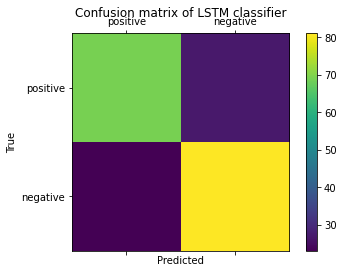

In [109]:
showConfusionMatrix(Y1_test[:,0], test_o)

In [110]:
hi=showWordWithCode(lemma_result, 'cleaned_review', X1_test)

In [111]:
saveSentimentAndResult(hi,test_o)